<a href="https://colab.research.google.com/github/Aswinramesh04/100-Days-of-DataScience/blob/main/Day54_RandomForest_Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              Day 54: Random Forest Hyperparameter Tuning   By: Loga Aswin

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# load datasets
df= pd.read_csv('/content/winequality-red (1).csv')

**Exploratory Data Analysis(EDA):**

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

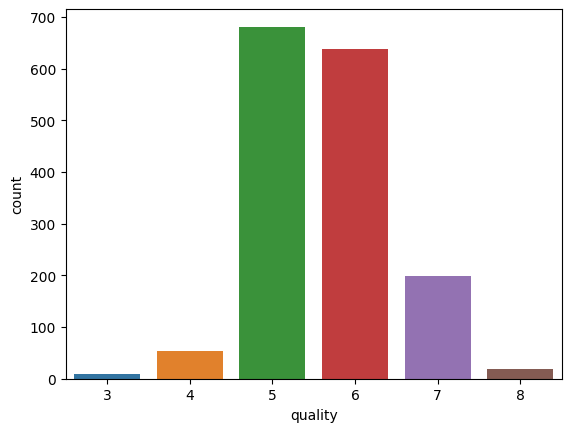

In [6]:
sns.countplot(x='quality', data=df)
plt.show()

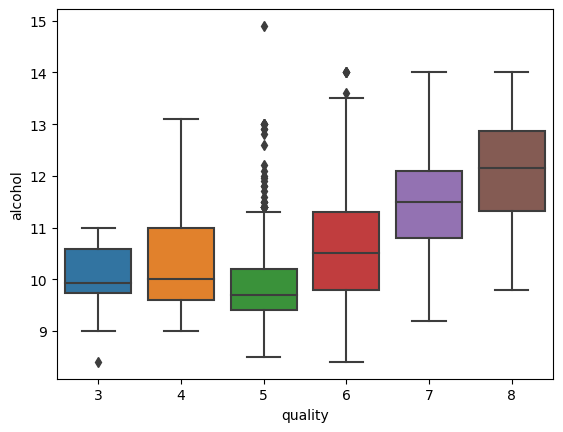

In [7]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.show()

In [8]:
# target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Splitting into train and test split:**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

**Using RandomForestClassifier Model:**

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

**Predict Test Results:**

In [13]:
y_pred = model.predict(X_test)

**Model Evaluation Metrics:**

In [14]:
from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7125


In [15]:
from sklearn.model_selection import GridSearchCV

In [23]:
from pprint import pprint

rf = RandomForestClassifier()

# Looking at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [17]:
# Defining evaluate function
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [18]:
# Define parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12, 14],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [21]:
# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

In [22]:
# Fit grid search to data
grid_search.fit(X_train, y_train)

# Get best parameters by grid search
best_grid = grid_search.best_estimator_

# Model Evaluate with from grid search
grid_accuracy = evaluate(best_grid, X_test, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 0.3438 degrees.
Accuracy = 93.76%.
